# Домашнее задание №3

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [0]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [0]:
corr = data.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1,0.01,0.01,0.08,-0.09,-0.02,-0.19,-0.27,-0.22,-0.14
Total_Bilirubin,0.01,1,0.87,0.21,0.21,0.24,-0.01,-0.22,-0.21,-0.22
Direct_Bilirubin,0.01,0.87,1,0.23,0.23,0.26,-0,-0.23,-0.2,-0.25
Alkaline_Phosphotase,0.08,0.21,0.23,1,0.13,0.17,-0.03,-0.17,-0.23,-0.18
Alamine_Aminotransferase,-0.09,0.21,0.23,0.13,1,0.79,-0.04,-0.03,-0,-0.16
Aspartate_Aminotransferase,-0.02,0.24,0.26,0.17,0.79,1,-0.03,-0.09,-0.07,-0.15
Total_Protiens,-0.19,-0.01,-0,-0.03,-0.04,-0.03,1,0.78,0.23,0.04
Albumin,-0.27,-0.22,-0.23,-0.17,-0.03,-0.09,0.78,1,0.69,0.16
Albumin_and_Globulin_Ratio,-0.22,-0.21,-0.2,-0.23,-0,-0.07,0.23,0.69,1,0.16
Dataset,-0.14,-0.22,-0.25,-0.18,-0.16,-0.15,0.04,0.16,0.16,1


In [0]:
# разделим датасет на тренировочные и тестовые данные (80% на 20%)
from sklearn.model_selection import train_test_split
X=data[['Direct_Bilirubin']]
Y=data[['Total_Bilirubin']]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.2,
    random_state = 42
)

In [0]:
# Сделаем reshape(-1, 1) как того требует модель
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
# y_test.shape()

In [0]:
# Подгрузим модель
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Обучим модель
model.fit(X_train, y_train)
# Посмотрим ошибку модели
model.score(X_test, y_test)

0.9430806402916108

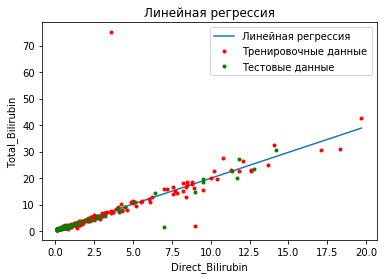

In [0]:
# Построим рисунок
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train), max(X_train), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.938984866239166

Ответ: Увеличить точность не удалось

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [0]:
# Так как data содержит пропущенные значения (Albumin_and_Globulin_Ratio), которые не допустимы в Логистической регрессии и пропущенных значений не много, то просто drop'нем их
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [0]:
# но сначала чтобы не повредить вычисления сверху, скопируем для Логистической регрессии отдельный Dataset в оперативной памяти
data_log = data.copy()
data_log.dropna(inplace = True)
data_log.info()
# Видно что пропущенных значений больше нет. Можно делить Dataset на Train и Test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
Age                           579 non-null int64
Gender                        579 non-null object
Total_Bilirubin               579 non-null float64
Direct_Bilirubin              579 non-null float64
Alkaline_Phosphotase          579 non-null int64
Alamine_Aminotransferase      579 non-null int64
Aspartate_Aminotransferase    579 non-null int64
Total_Protiens                579 non-null float64
Albumin                       579 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       579 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [0]:
# У нас проблемы, Хьюстон: Логистическая регрессия ругается на появление категориальной переменной Gender
# Пишем функцию, которая замение String to Int
data_log['Gender_int'] = data_log.apply(Gender_to_int, axis = 1)
# data_log['Gender'].drop(inplace = True)
del data_log['Gender']
data_log.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_int
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0


In [0]:
# Функция возвращающая код пола вместо Названия. Мужчина - 0, Женщина 1
def Gender_to_int(row):
  Gender_ = row['Gender']
  if Gender_ == 'Male':
    return 0
  elif Gender_ == 'Female':
    return 1

In [0]:
# Наконец-то делим выборку
from sklearn.linear_model import LogisticRegression
X_log = data_log[['Age', 'Gender_int', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 
              'Albumin_and_Globulin_Ratio']]
Y_log = data_log[['Dataset']]

In [0]:
# разделим на тренировочные данные и на тестовые. Пропорцию как в Задании 20% тест
X_train, X_test, y_train, y_test = train_test_split(X_log, Y_log, test_size=0.20, random_state=27)

In [0]:
# Обучаем
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)

# включить количество найденных параметров true positive и false negative
print(classification_report(y_test, model_pred))

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, model_pred).ravel()
print(f'true positive = {tp},' , f'false negative = {fn}')

# Результат не очень

              precision    recall  f1-score   support

           1       0.76      0.84      0.80        85
           2       0.39      0.29      0.33        31

    accuracy                           0.69       116
   macro avg       0.58      0.56      0.57       116
weighted avg       0.66      0.69      0.67       116

true positive = 9, false negative = 22


Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.




In [0]:
corr = data_log.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_int
Age,1,0.01,0.01,0.08,-0.09,-0.02,-0.19,-0.26,-0.22,-0.13,-0.06
Total_Bilirubin,0.01,1,0.87,0.21,0.21,0.24,-0.01,-0.22,-0.21,-0.22,-0.09
Direct_Bilirubin,0.01,0.87,1,0.23,0.23,0.26,0,-0.23,-0.2,-0.25,-0.1
Alkaline_Phosphotase,0.08,0.21,0.23,1,0.12,0.17,-0.03,-0.16,-0.23,-0.18,0.03
Alamine_Aminotransferase,-0.09,0.21,0.23,0.12,1,0.79,-0.04,-0.03,-0,-0.16,-0.08
Aspartate_Aminotransferase,-0.02,0.24,0.26,0.17,0.79,1,-0.03,-0.08,-0.07,-0.15,-0.08
Total_Protiens,-0.19,-0.01,0,-0.03,-0.04,-0.03,1,0.78,0.23,0.03,0.1
Albumin,-0.26,-0.22,-0.23,-0.16,-0.03,-0.08,0.78,1,0.69,0.16,0.1
Albumin_and_Globulin_Ratio,-0.22,-0.21,-0.2,-0.23,-0,-0.07,0.23,0.69,1,0.16,0
Dataset,-0.13,-0.22,-0.25,-0.18,-0.16,-0.15,0.03,0.16,0.16,1,0.08


In [0]:
# с Dataset ничего не коррелирует больше 50%, поэтому снизим размерность:
# Total_Bilirubin <- Direct_Bilirubin(удалим)
# Alamine_Aminotransferase <- Aspartate_Aminotransferase(удалим Aspartate_Aminotransferase, потому что Direct_Bilirubin больше коррелирует с Y, чем Aspartate_Aminotransferase. При этом параметры связаны)
# Albumin <- Total_Protiens, Albumin_and_Globulin_Ratio
data_log2 = data_log[['Dataset', 'Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Albumin', 'Gender_int' ]]

In [0]:
corr = data_log2.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,Dataset,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin,Gender_int
Dataset,1,-0.13,-0.22,-0.18,-0.16,0.16,0.08
Age,-0.13,1,0.01,0.08,-0.09,-0.26,-0.06
Total_Bilirubin,-0.22,0.01,1,0.21,0.21,-0.22,-0.09
Alkaline_Phosphotase,-0.18,0.08,0.21,1,0.12,-0.16,0.03
Alamine_Aminotransferase,-0.16,-0.09,0.21,0.12,1,-0.03,-0.08
Albumin,0.16,-0.26,-0.22,-0.16,-0.03,1,0.1
Gender_int,0.08,-0.06,-0.09,0.03,-0.08,0.1,1


In [0]:
data_log2.tail()

,Dataset,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin,Gender_int
578,2,60,0.5,500,20,1.6,0
579,1,40,0.6,98,35,3.2,0
580,1,52,0.8,245,48,3.2,0
581,1,31,1.3,184,29,3.4,0
582,2,38,1.0,216,21,4.4,0


In [0]:
# Делим выборку
from sklearn.linear_model import LogisticRegression
X_log2 = data_log2[['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Albumin', 'Gender_int']]
Y_log2 = data_log2[['Dataset']]

In [0]:
# разделим на тренировочные данные и на тестовые. Пропорцию как в Задании 20% тест
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_log2, Y_log2, test_size=0.20, random_state=27)
# Обучаем
model2 = LogisticRegression(solver='liblinear').fit(X_train2, y_train2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.
# from sklearn.metrics import classification_report
model_pred2 = model2.predict(X_test2)

# # включить количество найденных параметров true positive и false negative
print('Классификационный отчет 1, до снижения числа входящих переменных')
print(classification_report(y_test, model_pred))

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, model_pred).ravel()
print(f'true positive = {tp},' , f'false negative = {fn}')

print('Классификационный отчет 2, после снижения числа входящих переменных')
print(classification_report(y_test2, model_pred2))

from sklearn.metrics import confusion_matrix
tn2, fp2, fn2, tp2 = confusion_matrix(y_test2, model_pred2).ravel()
print(f'true positive = {tp2},' , f'false negative = {fn2}')

# Вывод: после снижения количества размерностей, качество модели немного улучшилось
# но модель попадает примерно также true positive = 9, false negative = 22

Классификационный отчет 1, до снижения числа входящих переменных
              precision    recall  f1-score   support

           1       0.76      0.84      0.80        85
           2       0.39      0.29      0.33        31

    accuracy                           0.69       116
   macro avg       0.58      0.56      0.57       116
weighted avg       0.66      0.69      0.67       116

true positive = 9, false negative = 22
Классификационный отчет 2, после снижения числа входящих переменных
              precision    recall  f1-score   support

           1       0.77      0.86      0.81        85
           2       0.43      0.29      0.35        31

    accuracy                           0.71       116
   macro avg       0.60      0.57      0.58       116
weighted avg       0.68      0.71      0.69       116

true positive = 9, false negative = 22


Посчитать квартили для всех колонок. 

In [0]:
data_log.quantile([0.25,0.5,0.75])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_int
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0,0.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0,0.0
0.75,58.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.10,2.0,0.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

Распределения  людей старше 50, Больные
Распределения  людей старше 50, Здоровые
Распределения  людей младше или равно 50, Больные
Распределения  людей младше или равно 50, Здоровые


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc6cb59c50>,
      dtype=object)

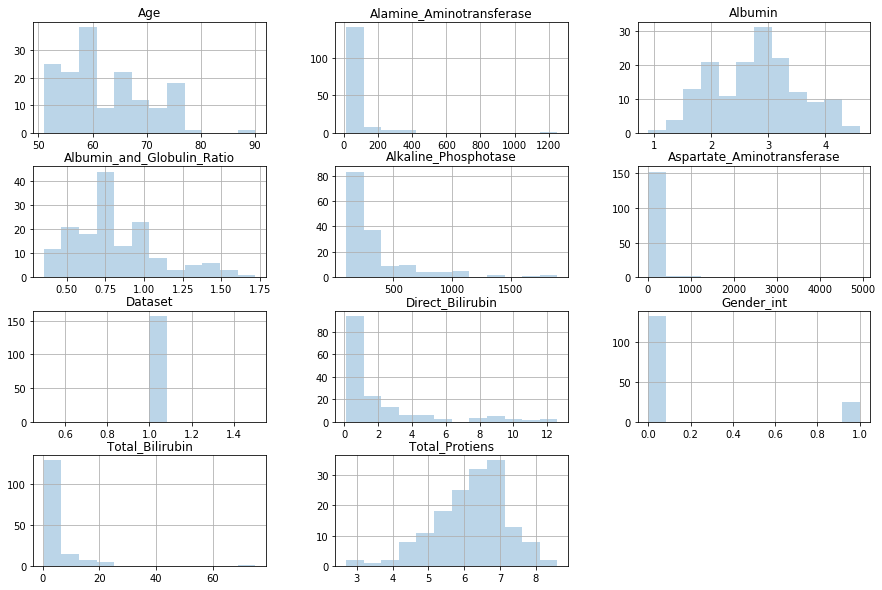

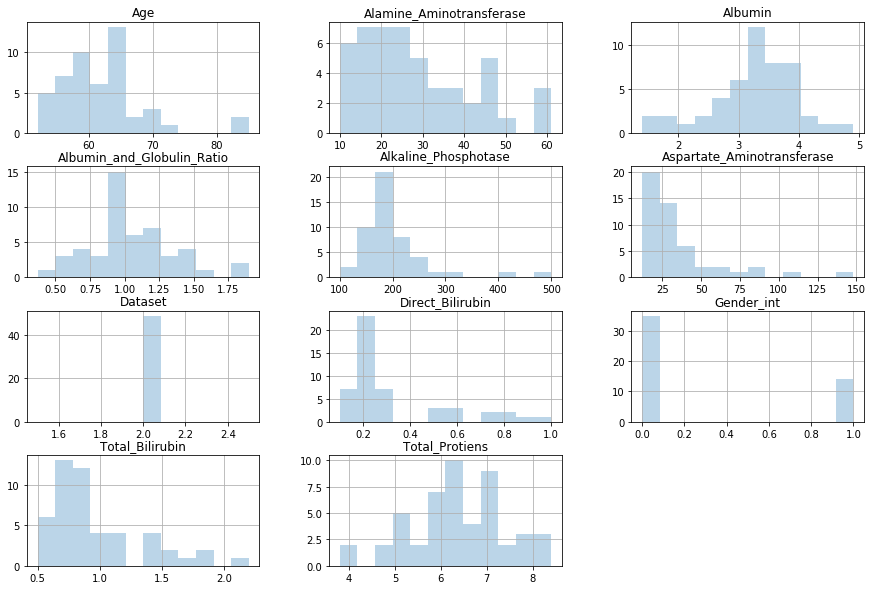

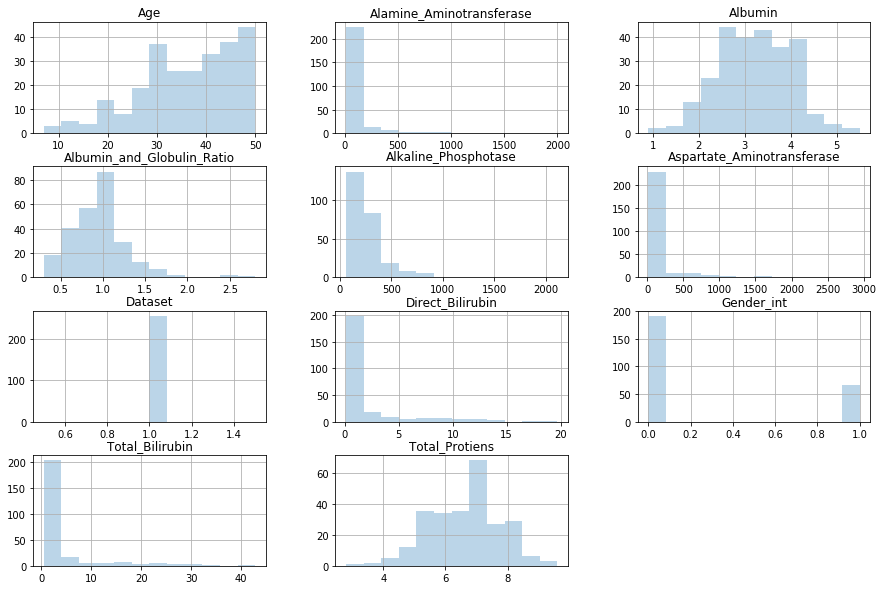

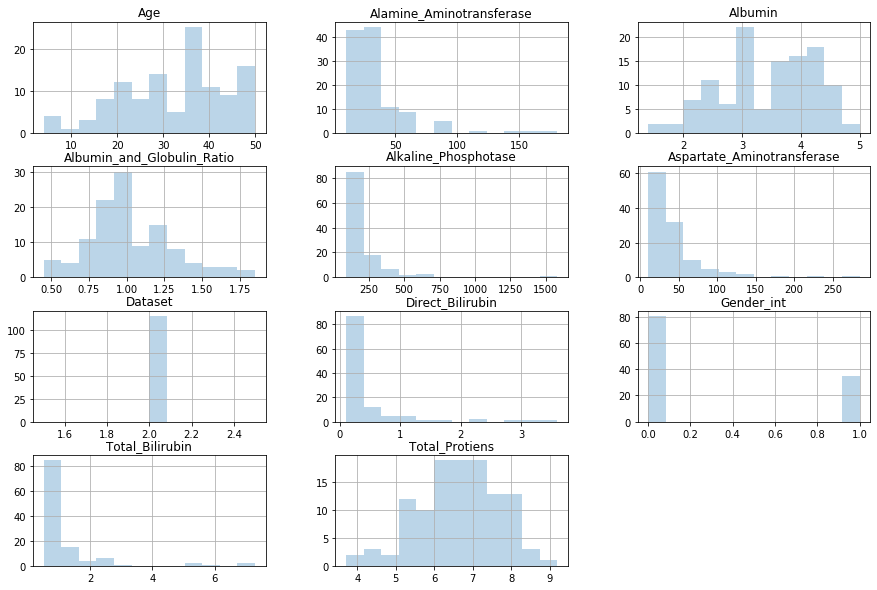

In [0]:
# import nsfg
import matplotlib.pyplot as plt

data_more50_ill = data_log[(data_log.Age > 50) & (data_log.Dataset == 1)] 
data_more50_healthy = data_log[(data_log.Age > 50) & (data_log.Dataset == 2)] 

data_less50_ill = data_log[(data_log.Age <= 50) & (data_log.Dataset == 1)] 
data_less50_healthy = data_log[(data_log.Age <= 50) & (data_log.Dataset == 2)] 

print('Распределения  людей старше 50, Больные')
data_more50_ill.hist(figsize=(15,10), bins=12, alpha=0.3)
print('Распределения  людей старше 50, Здоровые')
data_more50_healthy.hist(figsize=(15,10), bins=12, alpha=0.3)
print('Распределения  людей младше или равно 50, Больные')
data_less50_ill.hist(figsize=(15,10), bins=12, alpha=0.3)
print('Распределения  людей младше или равно 50, Здоровые')
data_less50_healthy.hist(figsize=(15,10), bins=12, alpha=0.3)


In [0]:
# Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?
# Ответ:
# [Средние значения] = [сумма всех значений]/[Количество значений]
# [квартиль 0.5]=[Медиана]=
# выстраиваем все значения в порядке возрастания, то что по середине Медиана, если четное число, то среднее между центральными сортированными значениями.
# Медиана лучше среднего подходит для оценок рынка и физических элементов, так как относительно защищена от выбросов
# print('Среднее значение людей после 50: {data_more50[data_more50.Dataset == 1].quantile([0.5])

print('Cтарше 50, Больные')
d1 = data_more50_ill.quantile([0.5]).T
d2 = data_more50_ill.mean()
d3 = pd.concat([d1, d2.reindex(d1.index)], axis=1 ).round(1)
d3.columns =['Quentile50', 'Mean'] 
print(d3, )
print('')

print('Cтарше 50, здоровые')
d4 = data_more50_healthy.quantile([0.5]).T
d5 = data_more50_healthy.mean()
d6 = pd.concat([d4, d5.reindex(d1.index)], axis=1 ).round(1)
d6.columns =['Quentile50', 'Mean'] 
print(d6)
print('')

print('Младше или равно 50, больные')
d7 = data_less50_ill.quantile([0.5]).T
d8 = data_less50_ill.mean()
d9 = pd.concat([d7, d8.reindex(d1.index)], axis=1 ).round(1)
d9.columns =['Quentile50', 'Mean'] 
print(d9)
print('')

print('Младше или равно 50, здоровые')
d10 = data_less50_healthy.quantile([0.5]).T
d11 = data_less50_healthy.mean()
d12 = pd.concat([d7, d8.reindex(d1.index)], axis=1 ).round(1)
d12.columns =['Quentile50', 'Mean'] 
print(d12)
print('')

Cтарше 50, Больные
                            Quentile50   Mean
Age                               60.0   62.3
Total_Bilirubin                    1.7    4.2
Direct_Bilirubin                   0.7    1.9
Alkaline_Phosphotase             238.0  364.9
Alamine_Aminotransferase          40.0   69.0
Aspartate_Aminotransferase        48.0  123.9
Total_Protiens                     6.3    6.2
Albumin                            2.9    2.8
Albumin_and_Globulin_Ratio         0.8    0.8
Dataset                            1.0    1.0
Gender_int                         0.0    0.2

Cтарше 50, здоровые
                            Quentile50   Mean
Age                               61.0   62.1
Total_Bilirubin                    0.8    1.0
Direct_Bilirubin                   0.2    0.3
Alkaline_Phosphotase             188.0  200.4
Alamine_Aminotransferase          26.0   28.7
Aspartate_Aminotransferase        25.0   34.9
Total_Protiens                     6.3    6.3
Albumin                            3.3  


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [173]:
ill_blr = data_log[data_log['Dataset']== 1]['Total_Bilirubin']
stats.ttest_1samp(ill_blr, data['Total_Bilirubin'].mean())


# Возьмем выборку женщин по параметру "trestbps" или уровень давления в состоянии спокойствия.
# female_bps = data[data['sex']==0]['trestbps']
# stats.ttest_1samp(female_bps, data['trestbps'].mean())

Ttest_1sampResult(statistic=2.505963234753917, pvalue=0.012595500848299367)

Ответ:
Выборка похожа на генеральную совокупность
T-значение 2.51, и в одновыборочном критерии мы оцениваем p-value.

p-value равно 0.012, что намного меньше стандартной альфа ошибки 0.05, поэтому мы ОТВЕРГАЕМ нулевую гипотезу и можем сказать, что имеется статистическое различие по полю ['Total_Bilirubin'] между Больными людьми в выборке и генеральной совокупности в целом.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [176]:
ill_blr = data_log[data_log['Dataset']== 1]['Total_Bilirubin']
health_blr = data_log[data_log['Dataset']== 2]['Total_Bilirubin']
stats.ttest_ind(ill_blr, health_blr)
# Ответ:
# p-value сильно больше, чем 0.05, поэтому мы ПРИНИМАЕМ нулевую гипотезу и можем сказать, 
# что НЕТ статистического различия по полю ['Total_Bilirubin'] между Больными и Здоровыми людьми

Ttest_indResult(statistic=5.422946004172417, pvalue=8.632557516910643e-08)

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [0]:
# функция для категоризации Dataframe по Возрасту
def Age_category(row):
  Age = row['Age']
  if 1 <= Age <30:
    return 1
  elif 30 <= Age <55:
    return 2
  elif 55 <= Age:
    return 3
  else:
    return 4

In [0]:
data_log['Age_group'] = data_log.apply(Age_category, axis = 1)
# data_log.head(10)

In [188]:
age_group_1 = data_log[data_log['Age_group']== 1]['Total_Bilirubin']
age_group_2 = data_log[data_log['Age_group']== 2]['Total_Bilirubin']
age_group_3 = data_log[data_log['Age_group']== 3]['Total_Bilirubin']
# Множественный тест (ANOVA)
stats.f_oneway(age_group_1, age_group_2, age_group_3)

# Ответ:
# p-value сильно больше, чем 0.05, поэтому мы ПРИНИМАЕМ нулевую гипотезу и можем сказать, 
# что НЕТ статистического различия по полю ['Total_Bilirubin'] между 3-мя возрастными группами 

F_onewayResult(statistic=1.944000740702783, pvalue=0.14406810907020204)

Вопросы задавать на почту yustiks@gmail.com